# NLP Assignment 1 (40% of grade): Sentiment Analysis from Tweets

This coursework will involve you implementing functions for a text classifier, which you will train to identify the **sentiment expressed in a text** in a dataset of approx. 27,000 entries, which will be split into a 80%/20% training/test split.

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [14]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import re

In [15]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path,encoding="utf8") as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))
            tuple(raw_data)      # to get raw data as a tuple

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)), label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)), label))

# Question 1: Input and Basic preprocessing (10 marks)

In [16]:
def parse_data_line(data_line):
    # Should return a tuple of the label as just positive or negative and the statement
    # e.g. (label, statement)
    label, text = data_line[1], data_line[2]  # Assuming label is in the second column, and text is in the fourth column
    return (label, text)

In [17]:
# Input: a string of one statement
def pre_process(text):
    # Should return a list of tokens
    tokens = re.findall(r'\w+', text)
    # Returning the list of tokens
    return tokens

# Question 2: Basic Feature Extraction (20 marks)

In [18]:
global_feature_dict = {}  # A global dictionary of features

def to_feature_vector(tokens):
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
    feature_vector = {}
    for token in tokens:
        # Used binary feature values (1 if present, 0 otherwise)
        feature_vector[token] = 1
        # Incrementally build up the global feature dictionary
        global_feature_dict[token] = global_feature_dict.get(token, 0) + 1

    return feature_vector

In [19]:
# TRAINING AND VALIDATING OUR CLASSIFIER
def train_classifier(data):
    print("Training Classifier...")
    pipeline = Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [20]:
#solution
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.model_selection import KFold

def cross_validate(dataset, folds):
    results = {'precision': 0, 'recall': 0, 'f1': 0, 'accuracy': 0}
    fold_size = int(len(dataset) / folds)

    for i in range(folds):
        print("Fold start on items %d - %d" % (i * fold_size, (i + 1) * fold_size))

        # Split the data into training and test sets for this fold
        train_data_fold = dataset[:i * fold_size] + dataset[(i + 1) * fold_size:]
        test_data_fold = dataset[i * fold_size: (i + 1) * fold_size]

        # Train the classifier on the training fold
        classifier = train_classifier(train_data_fold)

        # Test the classifier on the test fold
        test_true = [t[1] for t in test_data_fold]
        test_pred = predict_labels([x[0] for x in test_data_fold], classifier)

        # Evaluate the classifier's performance
        fold_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted')
        fold_accuracy = accuracy_score(test_true, test_pred)

        # Update the results dictionary with fold scores
        results['precision'] += fold_scores[0]
        results['recall'] += fold_scores[1]
        results['f1'] += fold_scores[2]
        results['accuracy'] += fold_accuracy

    # Calculate average scores
    results['precision'] /= folds
    results['recall'] /= folds
    results['f1'] /= folds
    results['accuracy'] /= folds

    return results

In [21]:
# PREDICTING LABELS GIVEN A CLASSIFIER
def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    preprocessed_sample = to_feature_vector(pre_process(sample))
    return classifier.classify(preprocessed_sample)

In [22]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset

# references to the data files
data_file_path = 'sentiment-dataset.tsv'

# Do the actual stuff (i.e., call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...", sep='\n')

load_data(data_file_path)

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross-validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...", sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 33540 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 33540 rawData, 26832 trainData, 6708 testData
Training Samples: 
26832
Features: 
68410


In [23]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Fold start on items 0 - 2683
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 2683 - 5366
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 5366 - 8049
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 8049 - 10732
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 10732 - 13415
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 13415 - 16098
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 16098 - 18781
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 18781 - 21464
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 21464 - 24147
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Fold start on items 24147 - 26830
Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'precision': 0.836138473716507,
 'recall': 0.8374953410361534,
 'f1': 0.8365109441364792,
 'accuracy': 0.8374953410361534}

# Question 4: Error Analysis (20 marks)

Training Classifier...


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The confusion matrix: 


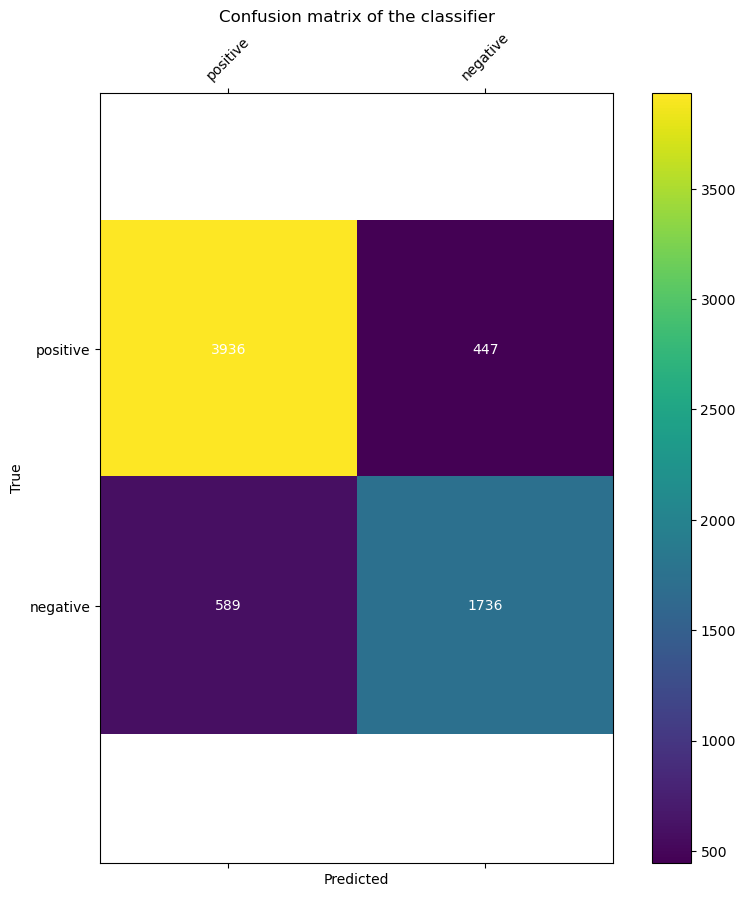

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    # cm = metrics.confusion_matrix(y_test, preds, labels)
    cm = metrics.confusion_matrix(y_test, preds, labels=labels)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')

    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

def error_analysis(true_labels, predicted_labels, data):
    false_positives = []
    false_negatives = []
    for i in range(len(true_labels)):
        if true_labels[i] == 'positive' and predicted_labels[i] == 'negative':
            false_negatives.append(data[i])
        elif true_labels[i] == 'negative' and predicted_labels[i] == 'positive':
            false_positives.append(data[i])

    # Print or save false positives and false negatives to files
    print_errors_to_file(false_positives, 'false_positives.txt')
    print_errors_to_file(false_negatives, 'false_negatives.txt')

def print_errors_to_file(errors, filename):
    with open(filename, 'w',encoding="utf8") as f:
        for error in errors:
            text, label = error
            f.write(f"Label: {label}, Text: {text}\n\n")

classifier = train_classifier(train_data)
true_labels = [sample[1] for sample in test_data]
predicted_labels = predict_labels([sample[0] for sample in test_data], classifier)
data = test_data

# Perform error analysis
error_analysis(true_labels, predicted_labels, data)

# Plot confusion matrix
print('The confusion matrix: ')
confusion_matrix_heatmap(true_labels, predicted_labels, labels=['positive', 'negative'])

# Questions 5: Optimising pre-processing and feature extraction (30 marks)

**Note:** it is advisable to implement question 5 in a separate notebook where you further develop the pre-processing and feature extraction functions you implemented above.

In [ ]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = False  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])